## 除息策略

### 單一股票

- 除息前 N 天上漲買進
- 除息前 1 天賣出

In [564]:
# 引入模組

import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
from dateutil.relativedelta import relativedelta    # 用於處理日期的加減

In [565]:
# Download Data

Symbol = "2330.TW"    # 下載個股資料
N = 14    # 設定參數(前 N 天買進)

stock = yf.Ticker(Symbol)

print(stock, "\n")

dividends = stock.dividends

df_dividends = dividends.reset_index()
df_dividends.columns = ['Date', 'Dividend']
df_dividends['Dividend_Date'] = df_dividends['Date']

df_dividends.set_index('Date', inplace=True)

df_dividends = df_dividends.tz_localize(None)    # 將 index 改為無時區
df_dividends['Dividend_Date'] = df_dividends['Dividend_Date'].dt.tz_localize(None)    # 將 columns 改為無時區 （要多加一個.dt）

df_dividends

yfinance.Ticker object <2330.TW> 



,Dividend,Dividend_Date
Date,,
2004-06-14,0.481996,2004-06-14
2005-06-13,1.821562,2005-06-13
2006-06-20,2.390180,2006-06-20
2007-06-08,2.954838,2007-06-08
2008-07-16,2.994919,2008-07-16
2009-07-15,2.984965,2009-07-15
2010-07-06,2.999732,2010-07-06
2011-06-29,2.999513,2011-06-29
2012-07-04,2.999481,2012-07-04


In [566]:
# 計算日期

df_dividends['PreOneDate'] = pd.to_datetime(df_dividends.index) - pd.offsets.BDay(1)    # 除息前 1 個交易日
df_dividends['PreNDate'] = pd.to_datetime(df_dividends.index) - pd.offsets.BDay(N)    # 除息前 N 個交易日

df_dividends

,Dividend,Dividend_Date,PreOneDate,PreNDate
Date,,,,
2004-06-14,0.481996,2004-06-14,2004-06-11,2004-05-25
2005-06-13,1.821562,2005-06-13,2005-06-10,2005-05-24
2006-06-20,2.390180,2006-06-20,2006-06-19,2006-05-31
2007-06-08,2.954838,2007-06-08,2007-06-07,2007-05-21
2008-07-16,2.994919,2008-07-16,2008-07-15,2008-06-26
2009-07-15,2.984965,2009-07-15,2009-07-14,2009-06-25
2010-07-06,2.999732,2010-07-06,2010-07-05,2010-06-16
2011-06-29,2.999513,2011-06-29,2011-06-28,2011-06-09
2012-07-04,2.999481,2012-07-04,2012-07-03,2012-06-14


In [567]:
# 新增除息前 1 天的 DataFrame

df_dividends_PreOneDate = df_dividends[['PreOneDate', 'Dividend_Date', 'Dividend', 'PreNDate']]
df_dividends_PreOneDate.set_index('PreOneDate', inplace=True)

df_dividends_PreOneDate

,Dividend_Date,Dividend,PreNDate
PreOneDate,,,
2004-06-11,2004-06-14,0.481996,2004-05-25
2005-06-10,2005-06-13,1.821562,2005-05-24
2006-06-19,2006-06-20,2.390180,2006-05-31
2007-06-07,2007-06-08,2.954838,2007-05-21
2008-07-15,2008-07-16,2.994919,2008-06-26
2009-07-14,2009-07-15,2.984965,2009-06-25
2010-07-05,2010-07-06,2.999732,2010-06-16
2011-06-28,2011-06-29,2.999513,2011-06-09
2012-07-03,2012-07-04,2.999481,2012-06-14


In [568]:
# 新增除息前 N 天的 DataFrame

df_dividends_PreNDate = df_dividends[['PreNDate', 'PreOneDate']]
df_dividends_PreNDate.set_index('PreNDate', inplace=True)

df_dividends_PreNDate

,PreOneDate
PreNDate,
2004-05-25,2004-06-11
2005-05-24,2005-06-10
2006-05-31,2006-06-19
2007-05-21,2007-06-07
2008-06-26,2008-07-15
2009-06-25,2009-07-14
2010-06-16,2010-07-05
2011-06-09,2011-06-28
2012-06-14,2012-07-03


In [569]:
# 讀取股價資訊

df = pd.read_csv("C:\\__STOCK\\DATA\\TWSE\\2330.csv", index_col="Date", usecols=['Date', 'Close']).rename(columns={"Close":Symbol})
df.index = pd.to_datetime(df.index, format="%Y%m%d")

df

,2330.TW
Date,
2000-01-04,178.0
2000-01-05,182.0
2000-01-06,178.0
2000-01-07,173.0
2000-01-10,179.0
...,...
2025-04-18,850.0
2025-04-21,835.0
2025-04-22,816.0


In [570]:
# Join 股價資訊（除息前 1 天）

df_dividends_PreOneDate = df_dividends_PreOneDate.join(df)

df_dividends_PreOneDate = df_dividends_PreOneDate.rename(columns={Symbol : Symbol+'_PreOneDate'})

df_dividends_PreOneDate

,Dividend_Date,Dividend,PreNDate,2330.TW_PreOneDate
PreOneDate,,,,
2004-06-11,2004-06-14,0.481996,2004-05-25,50.5
2005-06-10,2005-06-13,1.821562,2005-05-24,58.1
2006-06-19,2006-06-20,2.390180,2006-05-31,59.4
2007-06-07,2007-06-08,2.954838,2007-05-21,69.0
2008-07-15,2008-07-16,2.994919,2008-06-26,57.6
2009-07-14,2009-07-15,2.984965,2009-06-25,55.8
2010-07-05,2010-07-06,2.999732,2010-06-16,61.4
2011-06-28,2011-06-29,2.999513,2011-06-09,72.5
2012-07-03,2012-07-04,2.999481,2012-06-14,84.2


In [571]:
# Join 股價資訊（除息前 N 天）
df = df.copy(); df.index = pd.to_datetime(df.index, errors='coerce'); df = df.sort_index()
t  = df_dividends_PreNDate.copy(); t.index = pd.to_datetime(t.index, errors='coerce')

aligned = df['2330.TW'].reindex(t.index, method='ffill')    # 從 2330 裡面抓資料，如果當天沒有資料就往前一天抓

t['2330.TW_PreNDate'] = aligned.values

df_dividends_PreNDate = t

df_dividends_PreNDate.set_index("PreOneDate", inplace=True)

df_dividends_PreNDate

,2330.TW_PreNDate
PreOneDate,
2004-06-11,54.5
2005-06-10,56.4
2006-06-19,60.3
2007-06-07,69.2
2008-07-15,65.0
2009-07-14,53.7
2010-07-05,61.4
2011-06-28,76.9
2012-07-03,79.2


In [572]:
df_dividends_PreOneDate = df_dividends_PreOneDate.join(df_dividends_PreNDate).dropna()

df_dividends_PreOneDate

,Dividend_Date,Dividend,PreNDate,2330.TW_PreOneDate,2330.TW_PreNDate
PreOneDate,,,,,
2004-06-11,2004-06-14,0.481996,2004-05-25,50.5,54.5
2005-06-10,2005-06-13,1.821562,2005-05-24,58.1,56.4
2006-06-19,2006-06-20,2.390180,2006-05-31,59.4,60.3
2007-06-07,2007-06-08,2.954838,2007-05-21,69.0,69.2
2008-07-15,2008-07-16,2.994919,2008-06-26,57.6,65.0
2009-07-14,2009-07-15,2.984965,2009-06-25,55.8,53.7
2010-07-05,2010-07-06,2.999732,2010-06-16,61.4,61.4
2011-06-28,2011-06-29,2.999513,2011-06-09,72.5,76.9
2012-07-03,2012-07-04,2.999481,2012-06-14,84.2,79.2


In [573]:
df = df_dividends_PreOneDate.copy()

df = df.reset_index()

df.set_index('Dividend_Date', inplace=True)

df = df[['Dividend', 'PreOneDate', '2330.TW_PreOneDate', 'PreNDate', '2330.TW_PreNDate']]

df

,Dividend,PreOneDate,2330.TW_PreOneDate,PreNDate,2330.TW_PreNDate
Dividend_Date,,,,,
2004-06-14,0.481996,2004-06-11,50.5,2004-05-25,54.5
2005-06-13,1.821562,2005-06-10,58.1,2005-05-24,56.4
2006-06-20,2.390180,2006-06-19,59.4,2006-05-31,60.3
2007-06-08,2.954838,2007-06-07,69.0,2007-05-21,69.2
2008-07-16,2.994919,2008-07-15,57.6,2008-06-26,65.0
2009-07-15,2.984965,2009-07-14,55.8,2009-06-25,53.7
2010-07-06,2.999732,2010-07-05,61.4,2010-06-16,61.4
2011-06-29,2.999513,2011-06-28,72.5,2011-06-09,76.9
2012-07-04,2.999481,2012-07-03,84.2,2012-06-14,79.2


### 績效

- 損益（%）
- 勝率（%）｜ 賠率（%）
- 期望值

In [574]:
df['PL'] = df['2330.TW_PreOneDate'] - df['2330.TW_PreNDate']
df['PL %'] = (df['2330.TW_PreOneDate'] - df['2330.TW_PreNDate']) / df['2330.TW_PreNDate']
df['PL>0'] = np.where(df['PL'] > 0, 1, 0)

df = df.round(2)

df

,Dividend,PreOneDate,2330.TW_PreOneDate,PreNDate,2330.TW_PreNDate,PL,PL %,PL>0
Dividend_Date,,,,,,,,
2004-06-14,0.48,2004-06-11,50.5,2004-05-25,54.5,-4.0,-0.07,0
2005-06-13,1.82,2005-06-10,58.1,2005-05-24,56.4,1.7,0.03,1
2006-06-20,2.39,2006-06-19,59.4,2006-05-31,60.3,-0.9,-0.01,0
2007-06-08,2.95,2007-06-07,69.0,2007-05-21,69.2,-0.2,-0.00,0
2008-07-16,2.99,2008-07-15,57.6,2008-06-26,65.0,-7.4,-0.11,0
2009-07-15,2.98,2009-07-14,55.8,2009-06-25,53.7,2.1,0.04,1
2010-07-06,3.00,2010-07-05,61.4,2010-06-16,61.4,0.0,0.00,0
2011-06-29,3.00,2011-06-28,72.5,2011-06-09,76.9,-4.4,-0.06,0
2012-07-04,3.00,2012-07-03,84.2,2012-06-14,79.2,5.0,0.06,1


In [575]:
WinProb = round((df['PL'] > 0).sum() / len(df), 2)
LossProb = round((df['PL'] < 0).sum() / len(df), 2)

WinMean = round(df.loc[df["PL %"] > 0, "PL %"].mean(), 2)
LossMean = round(df.loc[df["PL %"] < 0, "PL %"].mean(), 2)

ExpectedValue = round(WinProb * WinMean + LossProb * LossMean, 2)

print("---------- 2330.TW ----------")
print(f"勝率：{WinProb}")
print(f"賠率：{LossProb}")
print(f"平均賺：{WinMean}")
print(f"平均賠：{LossMean}")
print(f"期望值：{ExpectedValue}")

---------- 2330.TW ----------
勝率：0.54
賠率：0.41
平均賺：0.05
平均賠：-0.06
期望值：0.0


### 畫圖

In [576]:
df_2330 = pd.read_csv("C:\\__STOCK\\DATA\\TWSE\\2330.csv", index_col="Date", usecols=['Date', 'Close']).rename(columns={"Close":Symbol})
df_2330.index = pd.to_datetime(df_2330.index, format="%Y%m%d")

df_dividends_PreOneDate = df_dividends_PreOneDate[['Dividend_Date']]
df_dividends_PreOneDate['PreOneDate'] = df_dividends_PreOneDate.index

df_dividends_PreNDate = df_dividends[['PreNDate']]
df_dividends_PreNDate.set_index("PreNDate",inplace=True)
df_dividends_PreNDate["PreNDate"]=df_dividends_PreNDate.index

df_2330 = df_2330.join(df_dividends_PreOneDate).join(df_dividends_PreNDate)

df_2330["Year"]=df_2330.index.year
df_2330["Month"]=df_2330.index.month
df_2330["Date"]=df_2330.index.day

df_2330["Signal_PreOneDate"]=np.where(df_2330.index == df_2330["PreOneDate"], 1000, 0)
df_2330["Signal_PreNDate"]=np.where(df_2330.index == df_2330["PreNDate"], -1000, 0)

C:\Users\micha\AppData\Local\Temp\ipykernel_11168\2402609031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dividends_PreOneDate['PreOneDate'] = df_dividends_PreOneDate.index
C:\Users\micha\AppData\Local\Temp\ipykernel_11168\2402609031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dividends_PreNDate["PreNDate"]=df_dividends_PreNDate.index


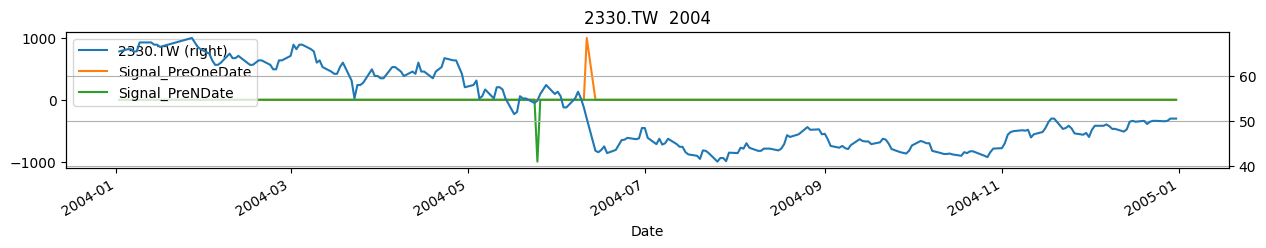

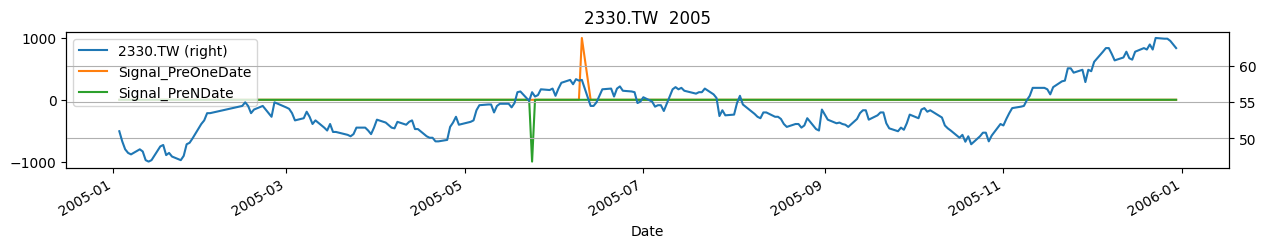

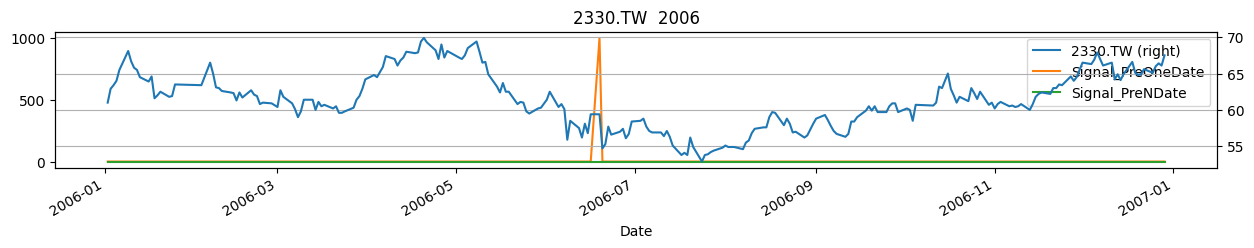

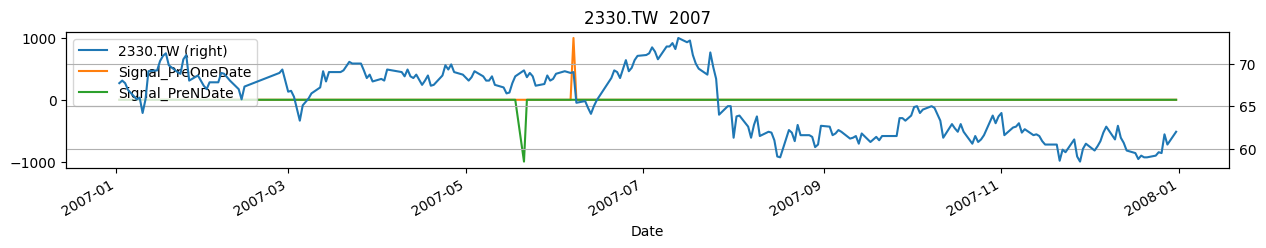

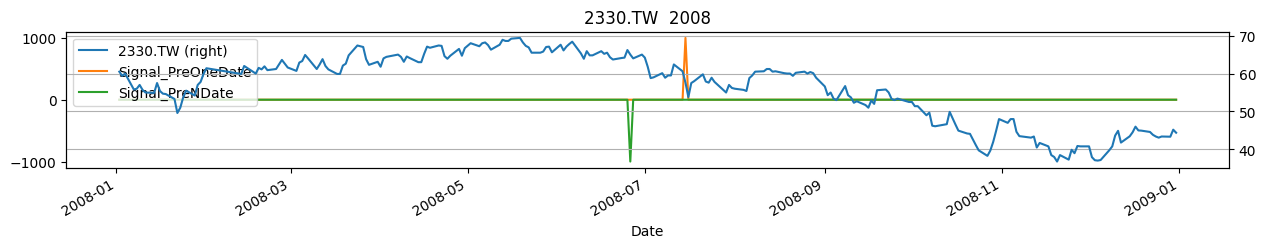

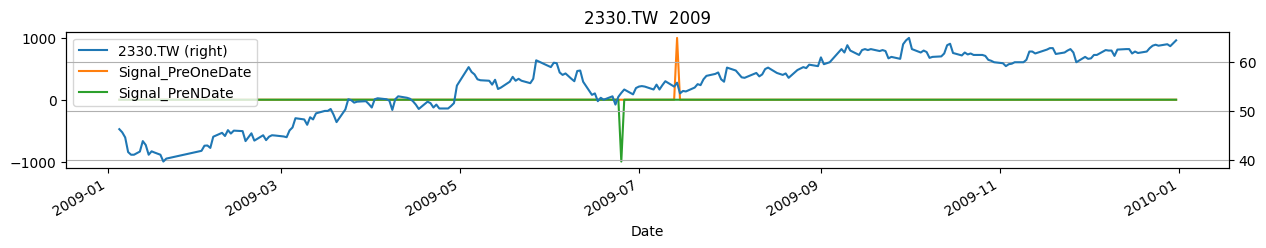

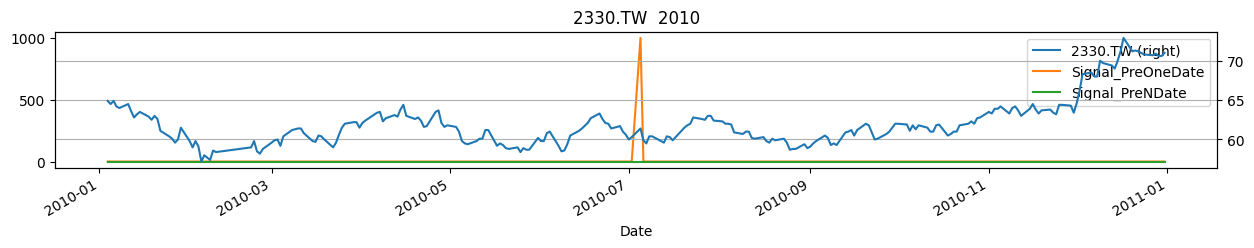

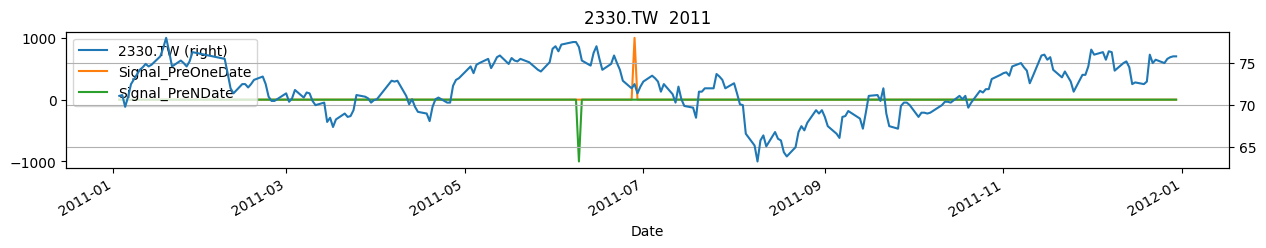

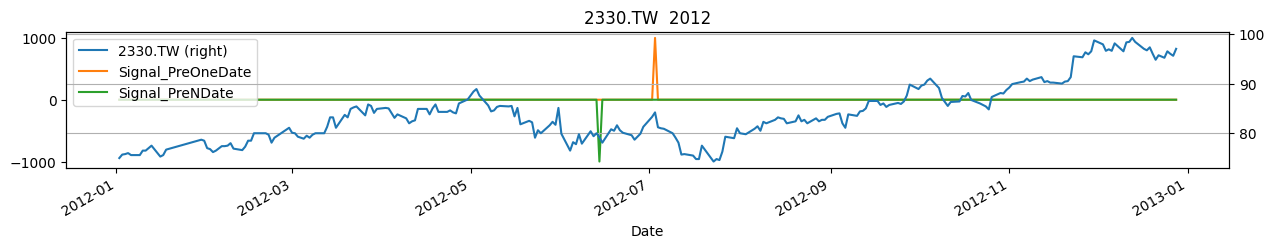

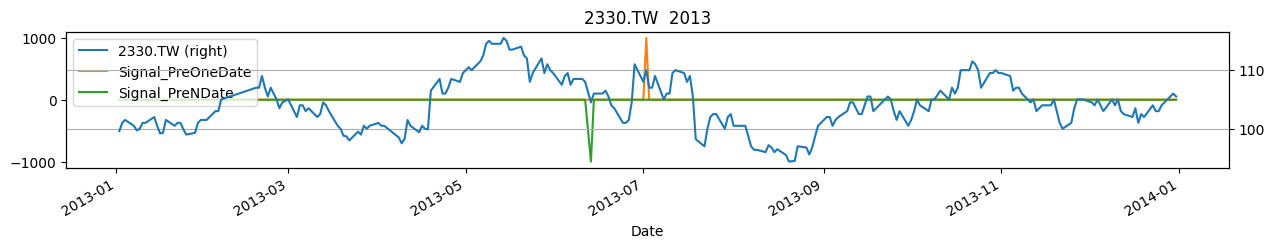

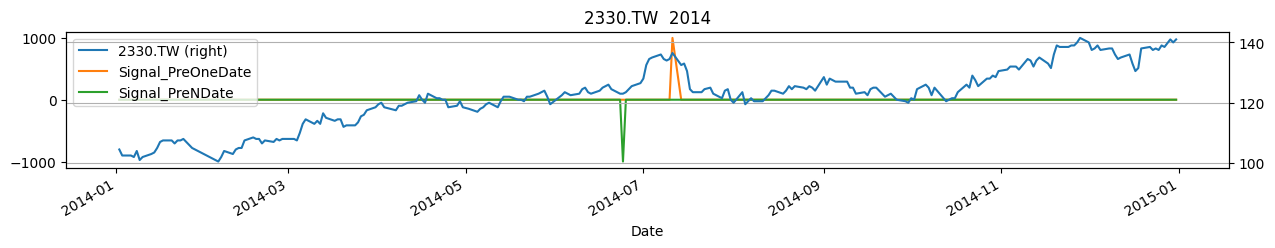

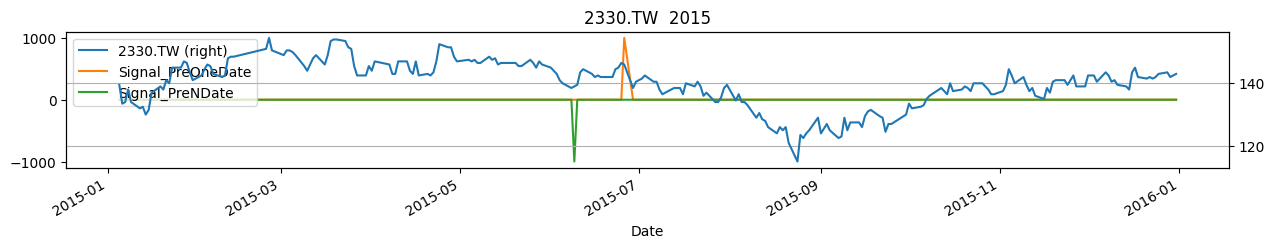

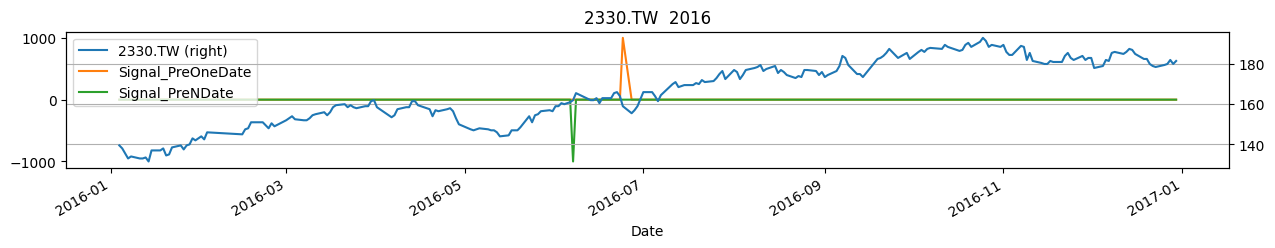

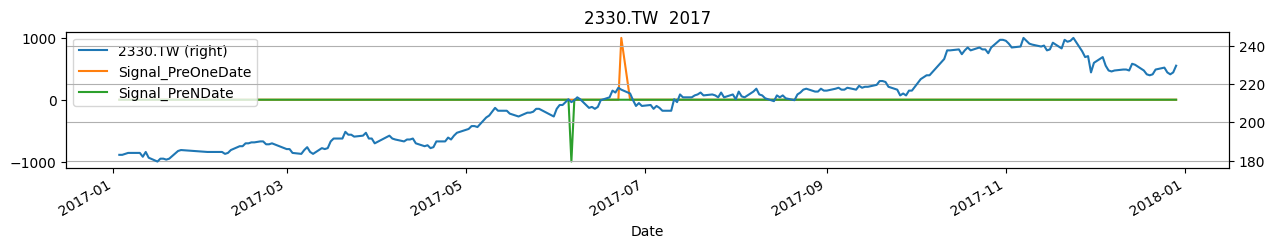

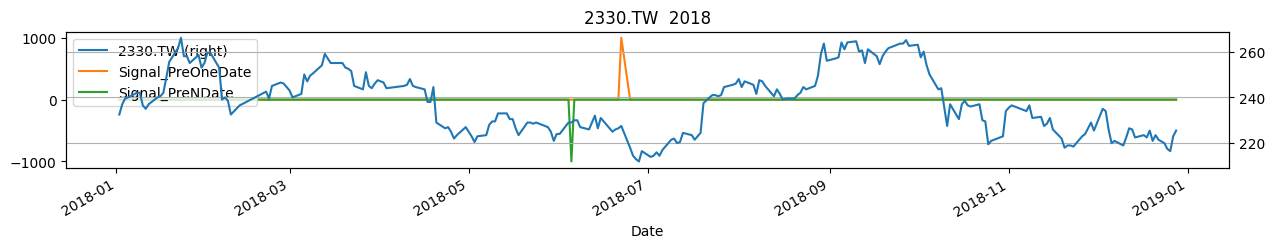

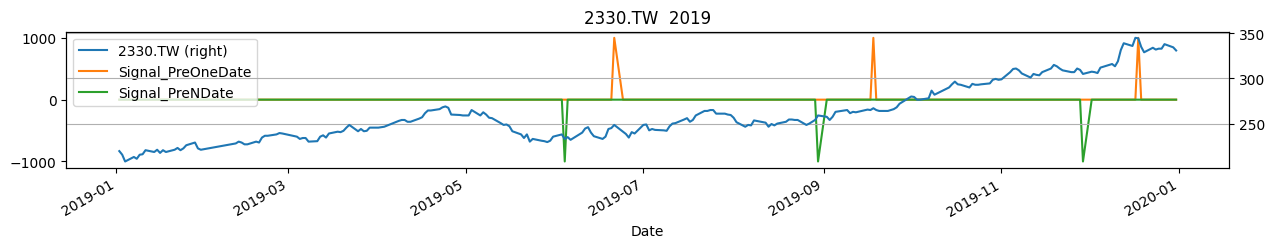

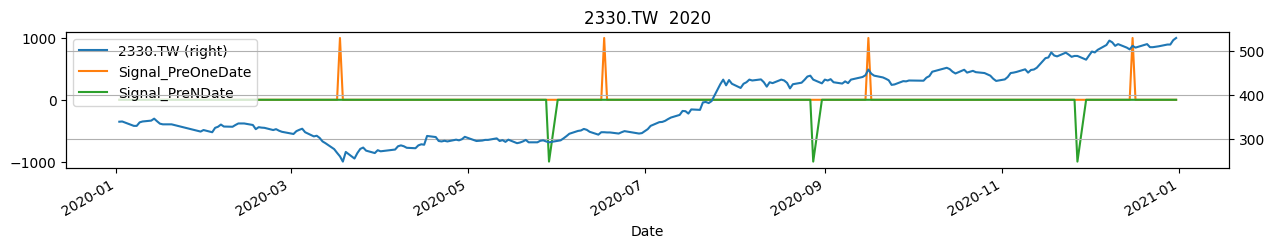

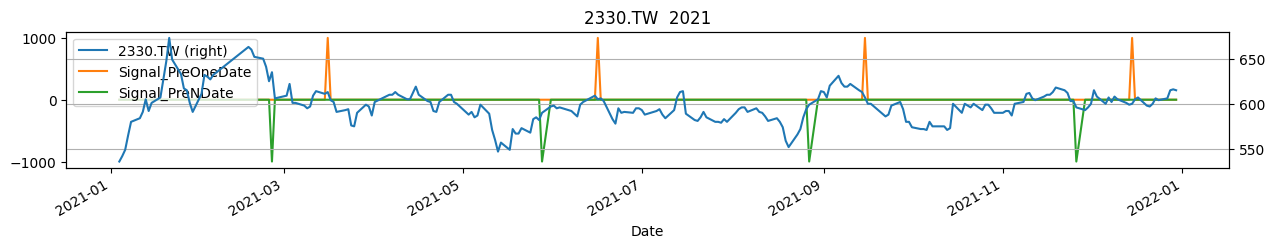

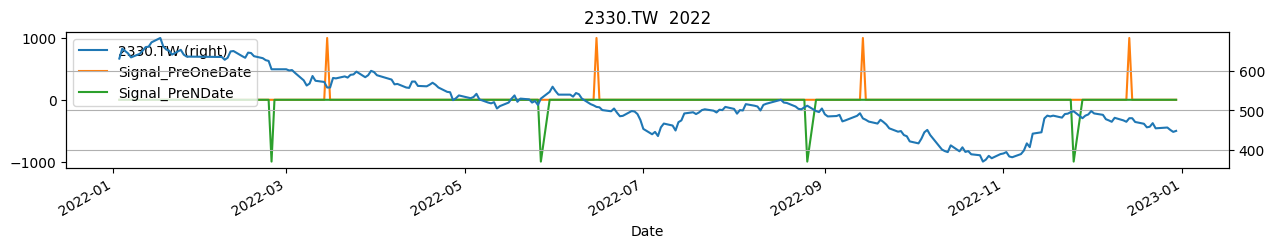

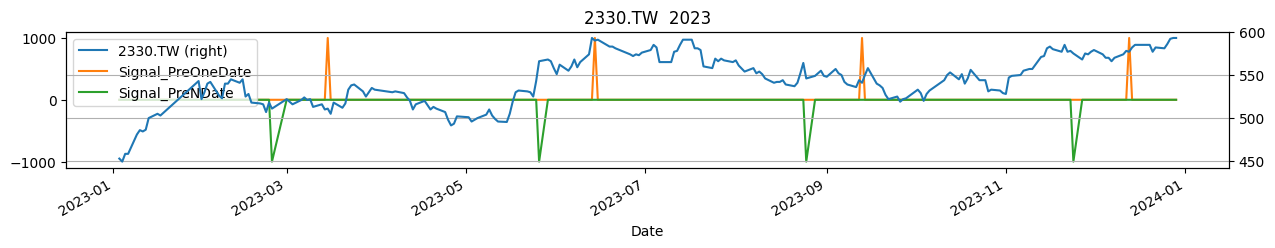

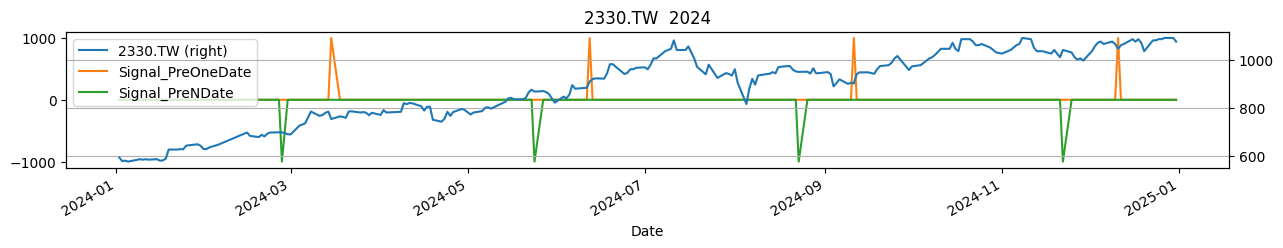

In [577]:
for Year in range(2004,2025,1):
    df_2330[[Symbol,"Signal_PreOneDate","Signal_PreNDate"]][df_2330.Year==Year].plot(title=f"2330.TW  {str(Year)}",secondary_y=Symbol,figsize=(15,2),grid=True)
    plt.show()